In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')

In [2]:

X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  

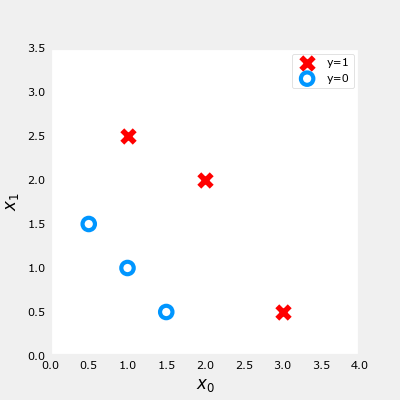

In [3]:

fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [4]:
# J(w,b) = 1/m Σ[loss(fw,b(x^(i)), y^(i))] --> eq (1)

# loss(fw,b(X^(i),y^(i)) = -y^(I)log(fw,b(x^(i)) - (1-y^(i) log(1-fw,b(x^(i))) --> eq (2)

# fw,b(x^(i)) = g(z^(i))--> eq (3)
# z^(i) = w.x^(i) + b --> eq (4)
# g(z^(i)) = 1/1+e^-z^(i) --> eq (5)

In [5]:
def compute_cost_logistic(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]  * np.log(f_wb_i) - (1 - y[i]) * np.log(1-f_wb_i)
    cost = cost / m
    return cost

In [6]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


In [7]:
# Now, let's see what the cost function output is for a different value of w.
# . In a previous lab, you plotted the decision boundary for b = -3, w0=1, w1=1. That is, you had
# b = -3, w = np.array([1,1]).

# Let's say you want to see if b = -4, w0=1, w1=1 or b = -4, w = np.array([1,1]) provides a better model.

# Let's first plot the decision boundary for these two different 
#  values to see which one fits the data better.

# . For b= -3, w0=1, w1=1, we'll plot -3 + x0 + x1 = 0 (shown in blue)
# . For b = -4 w0=1, w1=1, we'll plot -4 + x0 + x1 = 0 (shown in magenta)

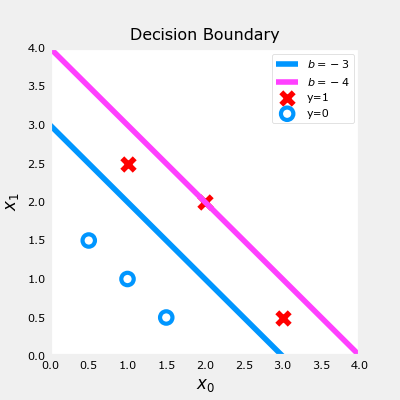

In [8]:
import matplotlib.pyplot as plt
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b=-3$")
ax.plot(x0,x1_other,c=dlc["dlmagenta"], label="$b=-4$")
ax.axis([0,4,0,4])

# Plot the original data
# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [9]:
# You can see from this plot that b = -4, w = np.array([1,1]) is a worse model for the training data.
#Let's see if the cost function implementation reflects this.

In [10]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [11]:
# You can see the cost function behaves as expected and the cost for b = -4, w = np.array([1,1]) 
#is indeed higher than the cost for b = -3, w = np.array([1,1])